In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
from mpl_toolkits.mplot3d import axes3d

In [2]:
h = 50e-3

E = 69e9

nu = 0.35


D = h**3 * E / (12*(1-nu**2))

a = 1.
b = 1.
N = 101


P = -10e3

xi = a / 2
eta = a / 2

x = np.linspace(0,a,num=N)
y = np.linspace(0,b,num=N)


max_m = 16
max_n = 16

In [3]:
@nb.njit
def getamn(P,a,b,xi,eta,m,n):
    return 4* P * np.sin( m * np.pi * xi / a ) * np.sin( n * np.pi * eta / b )/(a*b) 

In [4]:
@nb.njit
def Deformacion(x, y, w, a, b, P, xi, eta, D, max_m, max_n):
    M, N = w.shape
    for m in range(1, max_m):
        for n in range(1, max_n):
            amn = getamn(P, a, b, xi, eta, m, n)
            for i in range(M):
                for j in range(N):
                    w[i, j] += amn / ((m/a)**2 + (n/a)**2)**2 * \
                        np.sin(m * np.pi * x[i, j] / a) * np.sin(n * np.pi * y[i, j] / b) / (np.pi**4 * D)

In [5]:
xx,yy = np.meshgrid(x,y)

w = np.zeros_like(xx)

In [6]:
%timeit Deformacion(xx,yy,w,a,b,P,xi,eta,D,max_m,max_n)

48.6 ms ± 740 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


<IPython.core.display.Javascript object>


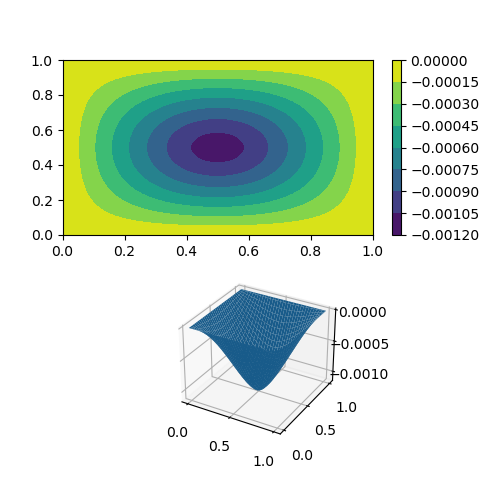

In [7]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2, projection='3d')

c = ax1.contourf(xx,yy,w)
fig.colorbar(c, ax = ax1)

ax2.plot_surface(xx,yy,w)